In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("hotel_bookings.csv")
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [ ]:
resort_hotel = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city_hotel = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

##we can understand that in initial months and last months the booking are decreasing so in those months we can give some offers to increase the number of customers

/tmp/ipython-input-7-1652678859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["arrival_date_month"] = pd.Categorical(
/tmp/ipython-input-7-1652678859.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = filtered_data.groupby(
/tmp/ipython-input-7-1652678859.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-7-1652678859.py:30: UserWarning: set_ticklabels() should on

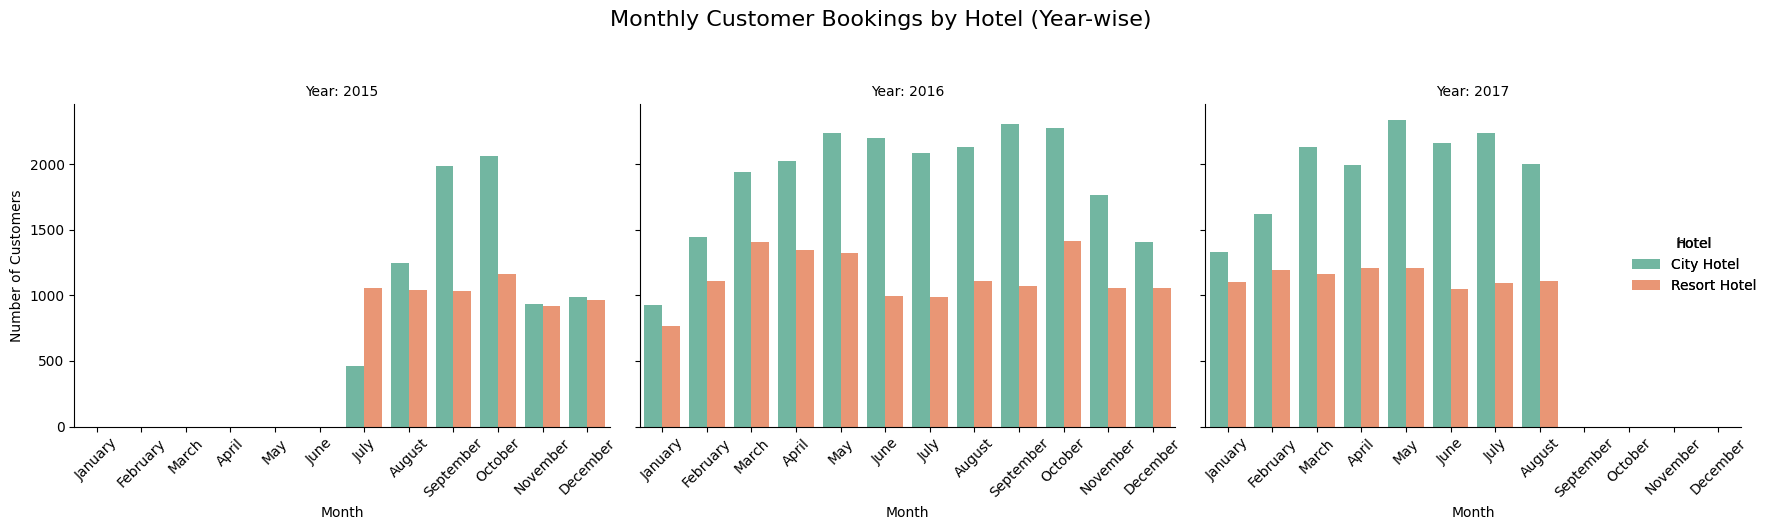

In [ ]:
filtered_data = data[data["is_canceled"] == 0]

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

filtered_data["arrival_date_month"] = pd.Categorical(
    filtered_data["arrival_date_month"],
    categories=month_order,
    ordered=True
)
monthly_counts = filtered_data.groupby(
    ["arrival_date_year", "arrival_date_month", "hotel"]
).size().reset_index(name="bookings")
g = sns.catplot(
    data=monthly_counts,
    kind="bar",
    x="arrival_date_month",
    y="bookings",
    hue="hotel",
    col="arrival_date_year",
    col_wrap=3,
    height=5,

    palette="Set2"
)
g.set_axis_labels("Month", "Number of Customers")
g.set_titles("Year: {col_name}")
g.add_legend(title="Hotel")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
g.fig.suptitle("Monthly Customer Bookings by Hotel (Year-wise)", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

##how lead time affects cancellation ?

/tmp/ipython-input-8-2365466061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="is_canceled", y="lead_time", data=data, palette="cool", inner="box")


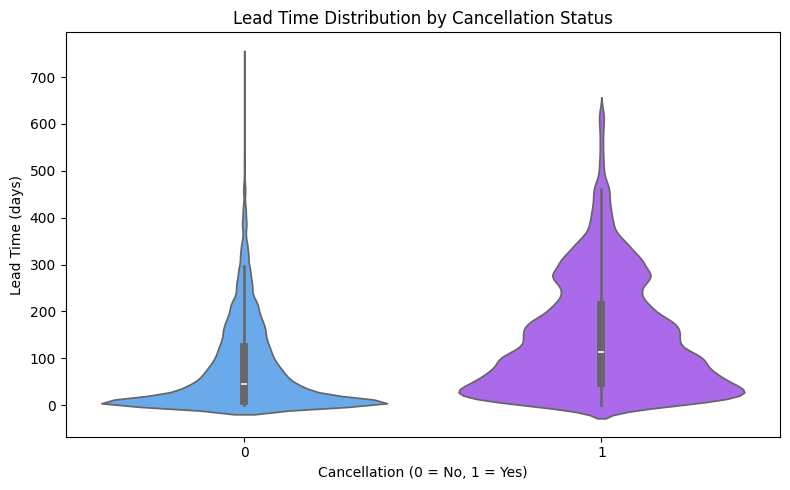

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="is_canceled", y="lead_time", data=data, palette="cool", inner="box")
plt.title("Lead Time Distribution by Cancellation Status")
plt.xlabel("Cancellation (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()

##this will show which hotel get higher customer year wise  so that we can use the same staregy to increase the customer rate again

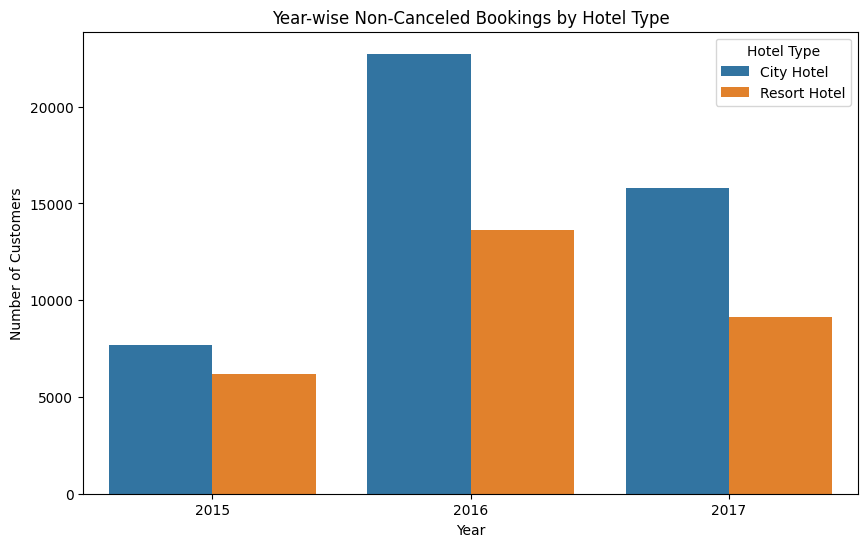

In [ ]:
data = pd.read_csv("hotel_bookings.csv")

non_canceled = data[data["is_canceled"] == 0]

yearly_counts = non_canceled.groupby(["arrival_date_year", "hotel"]).size().reset_index(name="bookings")

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_counts, x="arrival_date_year", y="bookings", hue="hotel")
plt.title("Year-wise Non-Canceled Bookings by Hotel Type")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.legend(title="Hotel Type")
plt.show()

##To increase the count of people the hotel should start some weekend offers like for family

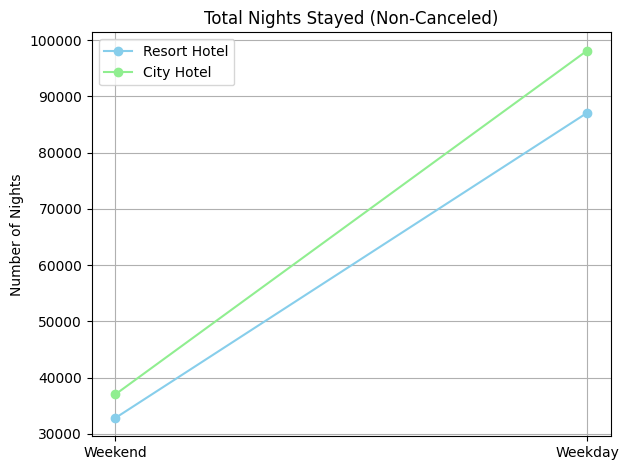

In [ ]:
non_canceled = data[data["is_canceled"] == 0]

resort_weekend = non_canceled[non_canceled["hotel"] == "Resort Hotel"]["stays_in_weekend_nights"].sum()
resort_weekday = non_canceled[non_canceled["hotel"] == "Resort Hotel"]["stays_in_week_nights"].sum()

city_weekend = non_canceled[non_canceled["hotel"] == "City Hotel"]["stays_in_weekend_nights"].sum()
city_weekday = non_canceled[non_canceled["hotel"] == "City Hotel"]["stays_in_week_nights"].sum()
labels = ["Weekend", "Weekday"]
resort = [resort_weekend, resort_weekday]
city = [city_weekend, city_weekday]


plt.plot(labels, resort, marker='o', label='Resort Hotel', color='skyblue')
plt.plot(labels, city, marker='o', label='City Hotel', color='lightgreen')

plt.title("Total Nights Stayed (Non-Canceled)")
plt.ylabel("Number of Nights")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Re-evaluate pricing, or bundle meals with discounts (e.g., “Stay 3 nights, get full board for the price of half”).

increase the price of most wanted  meal and decrese of lower one and include some deals

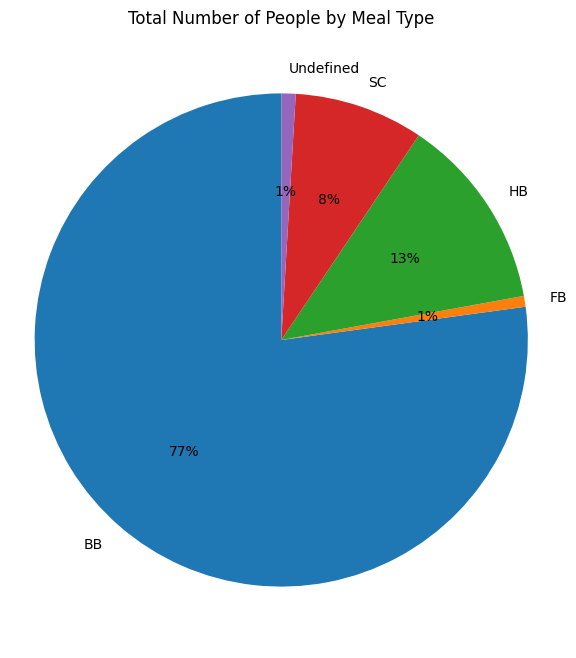

In [ ]:
data["total_people"] = data["adults"] + data["children"].fillna(0) + data["babies"]
meal_summary = data.groupby("meal")["total_people"].sum()

plt.figure(figsize=(7,8))
plt.pie(meal_summary,
        labels=meal_summary.index,
        autopct='%1.0f%%',
        startangle=90)

plt.title("Total Number of People by Meal Type")
plt.axis('equal')
plt.show()

##to understand the most liked room type

/tmp/ipython-input-12-1027340404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_counts.index, y=room_counts.values, palette='viridis')


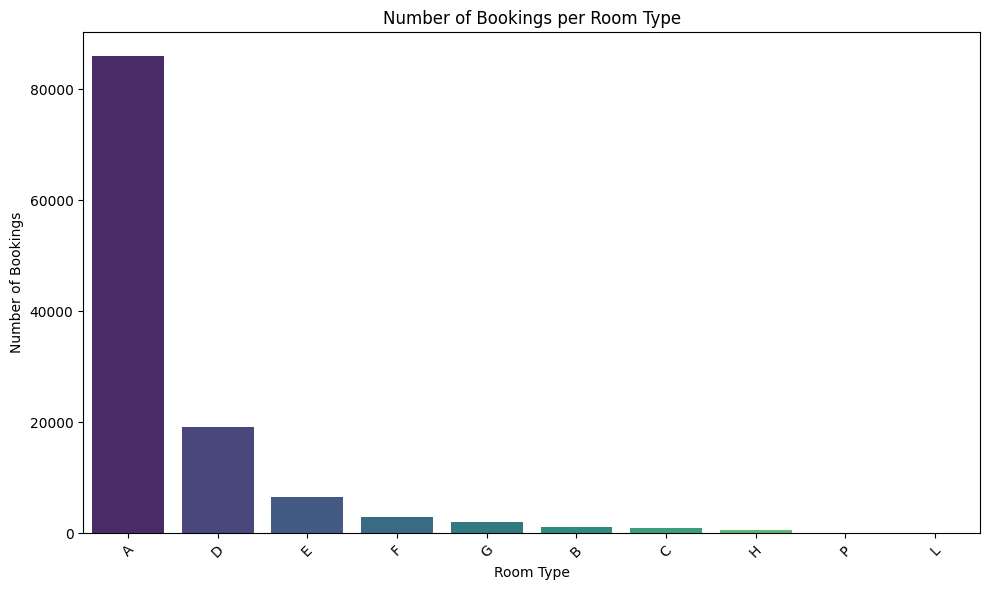

In [ ]:
# Count the number of bookings per room type
room_counts = data['reserved_room_type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=room_counts.index, y=room_counts.values, palette='viridis')
plt.title('Number of Bookings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Which companies generate the highest overall revenue? Facet Grid with Bar

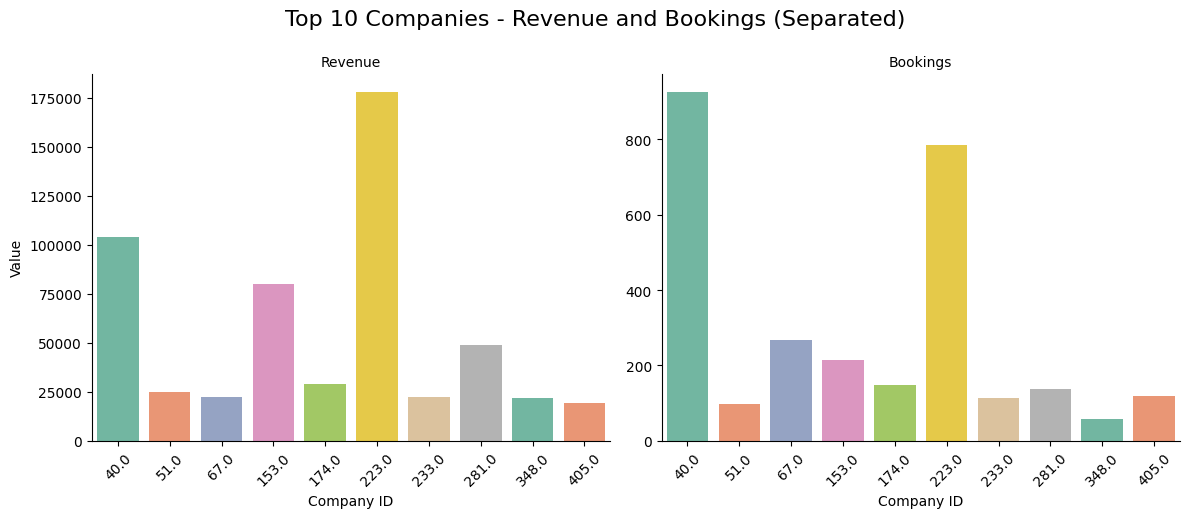

In [ ]:
data["total nights"]=data["stays_in_weekend_nights"]+data["stays_in_week_nights"]
data=data[data['company'] != 0]
data['Revenue'] = data['adr'] * data['total nights']
company_bookings = data['company'].value_counts()
bookings_data = pd.DataFrame({
    'company': company_bookings.index,
    'Bookings': company_bookings.values
})
company_revenue = data.groupby('company')['Revenue'].sum()
revenue_data = pd.DataFrame({
    'company': company_revenue.index,
    'Revenue': company_revenue.values
})
combined = pd.merge(bookings_data, revenue_data, on='company')
top_combined = combined.sort_values(by='Revenue', ascending=False).head(10)
plot_data = pd.DataFrame({
    'Company': top_combined['company'].tolist() * 2,
    'Metric': ['Revenue'] * len(top_combined) + ['Bookings'] * len(top_combined),
    'Value': top_combined['Revenue'].tolist() + top_combined['Bookings'].tolist()
})
g = sns.FacetGrid(plot_data, col='Metric', sharey=False, height=5, aspect=1.2)
g.map_dataframe(sns.barplot, x='Company', y='Value',hue="Company", palette='Set2',legend=False)
g.set_titles("{col_name}")
g.set_axis_labels("Company ID", "Value")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Top 10 Companies - Revenue and Bookings (Separated)", fontsize=16)
plt.show()

## Which hotel type (City or Resort) generates more revenue and profit?”

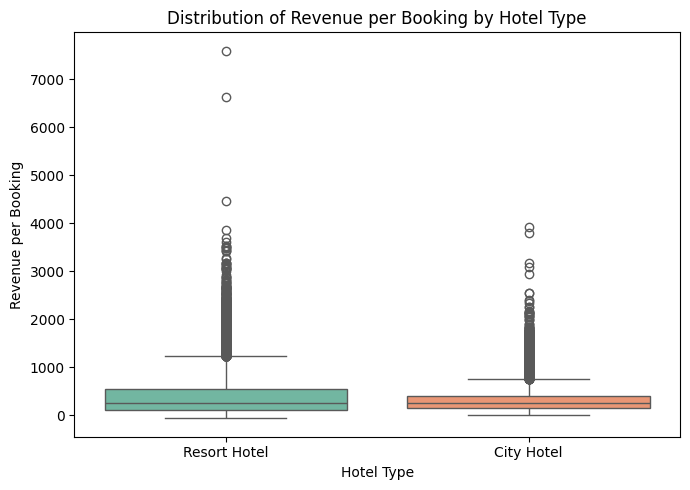

In [ ]:
data_completed = data[data['is_canceled'] == 0]
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_completed, x='hotel', y='Revenue',hue="hotel", palette='Set2')
plt.title('Distribution of Revenue per Booking by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Revenue per Booking')
plt.tight_layout()
plt.show()

## Q4: What factors most influence total revenue per booking?
Analyze which booking-related variables are strongly correlated with total revenue, helping identify what drives profitability.

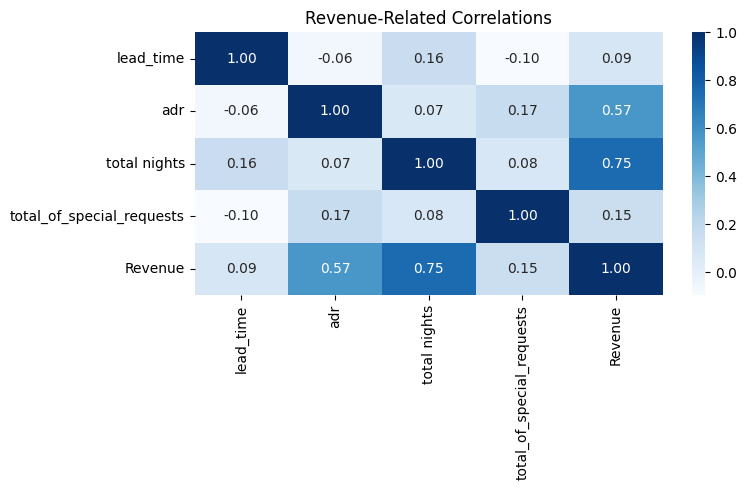

In [ ]:

data['Revenue'] = data['adr'] * data['total nights']
data["total nights"]=data["stays_in_weekend_nights"]+data["stays_in_week_nights"]
rev_cols = ['lead_time', 'adr', 'total nights', 'total_of_special_requests', 'Revenue']
rev_corr = data[rev_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(rev_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Revenue-Related Correlations")
plt.tight_layout()
plt.show()

## Which customer types bring the most value beyond room bookings?  

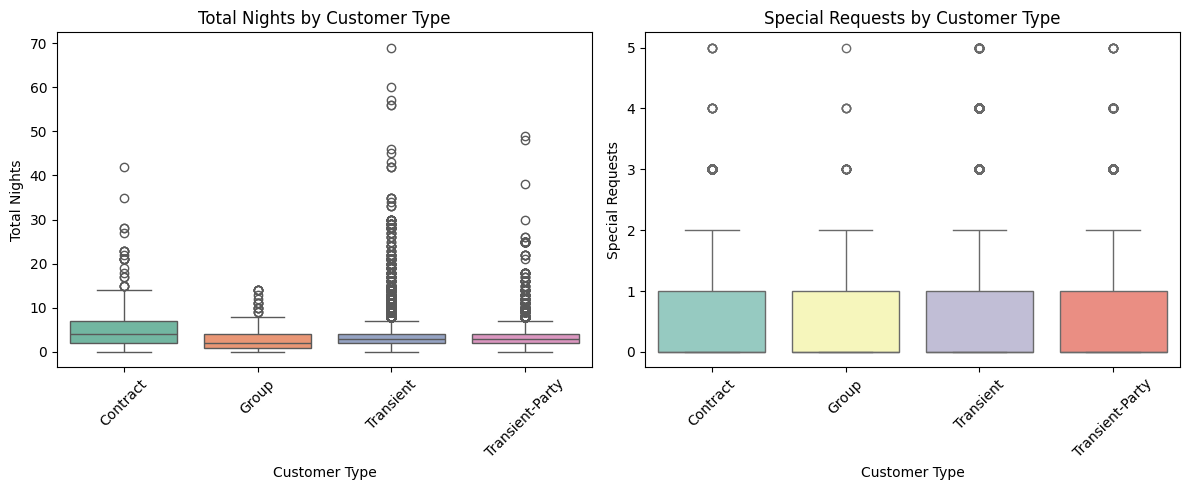

In [ ]:
# Create side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data['customer_type'] = data['customer_type'].astype('category')

# Boxplot 1: Total Nights by Customer Type
sns.boxplot(data=data, x='customer_type', y='total nights', hue='customer_type', legend=False, ax=axes[0], palette='Set2')
axes[0].set_title('Total Nights by Customer Type')
axes[0].set_xlabel('Customer Type')
axes[0].set_ylabel('Total Nights')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot 2: Special Requests by Customer Type
sns.boxplot(data=data, x='customer_type', y='total_of_special_requests', hue='customer_type', legend=False, ax=axes[1], palette='Set3')
axes[1].set_title('Special Requests by Customer Type')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Special Requests')
axes[1].tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()




## Is there a relationship between how early customers book (lead_time) and how much they pay per night (adr)?

Helps identify if customers who book early pay more or less.
May reveal pricing strategies or customer behavior patterns for each hotel.

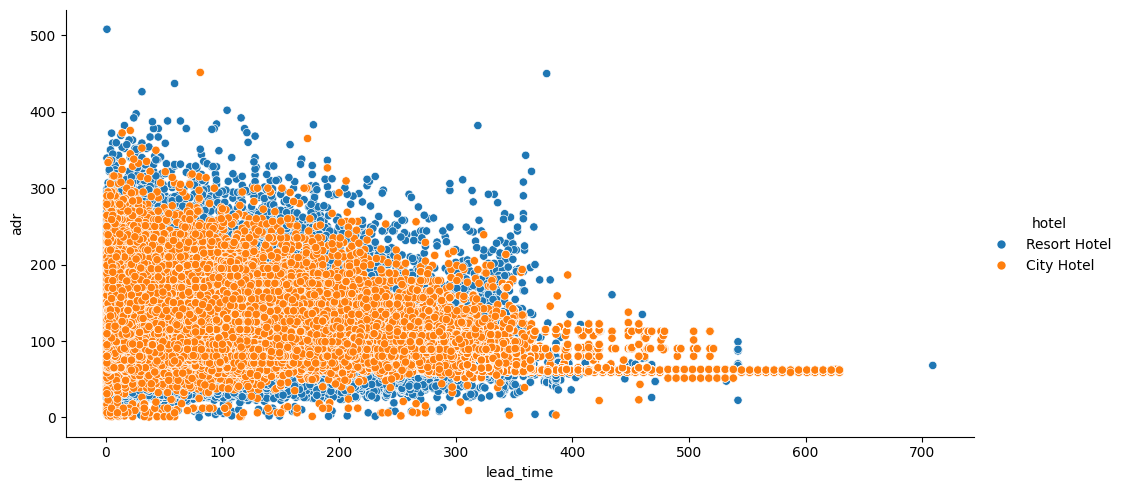

In [ ]:
df = data[data["adr"] != 5400.0]
q=df[(df["lead_time"] > 0) & (df["adr"] > 0)]
sns.relplot(data=q, x='lead_time', y='adr',aspect=2,hue="hotel")

## What is the price variation for different room types, and are some room types priced higher on average?
Adjust pricing strategy per room type.
Promote or upgrade underbooked room types.
Balance room availability based on profitability.

/tmp/ipython-input-18-634079232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='reserved_room_type', y='adr', jitter=True, alpha=0.5, palette="Set2")


<Axes: xlabel='reserved_room_type', ylabel='adr'>

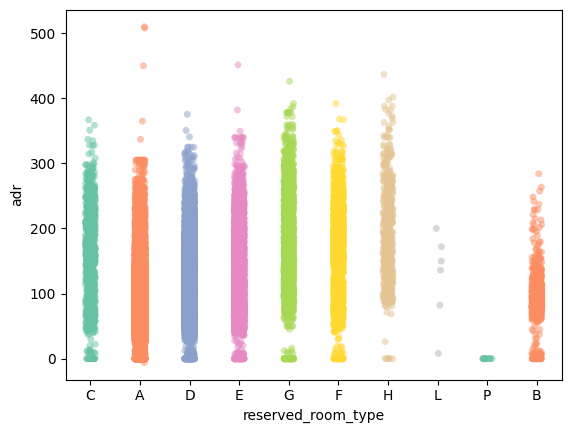

In [ ]:
sns.stripplot(data=df, x='reserved_room_type', y='adr', jitter=True, alpha=0.5, palette="Set2")

## What is the most common price range for rooms, and how are room rates distributed overall?
Helps in pricing strategy: set competitive yet profitable rates.
Understand guest affordability range.
Detect anomalous pricing or promotions that spiked prices.

<Axes: xlabel='adr', ylabel='Density'>

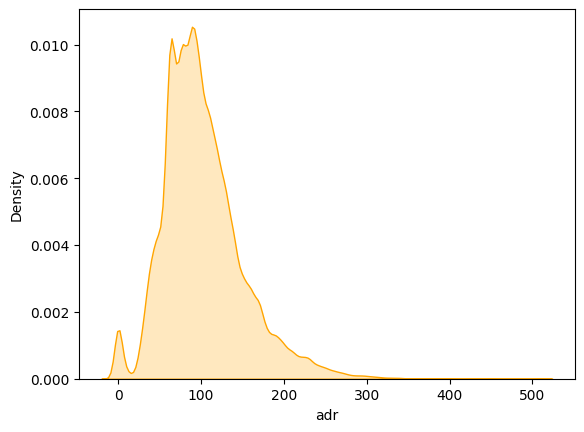

In [ ]:
sns.kdeplot(df['adr'], fill=True, color='orange')

## How do room prices vary by room type and hotel category?
Adjust prices of specific room types based on hotel type and customer willingness to pay.
Promote underbooked room types with good ADR potential.
Optimize revenue by aligning pricing with market demand.

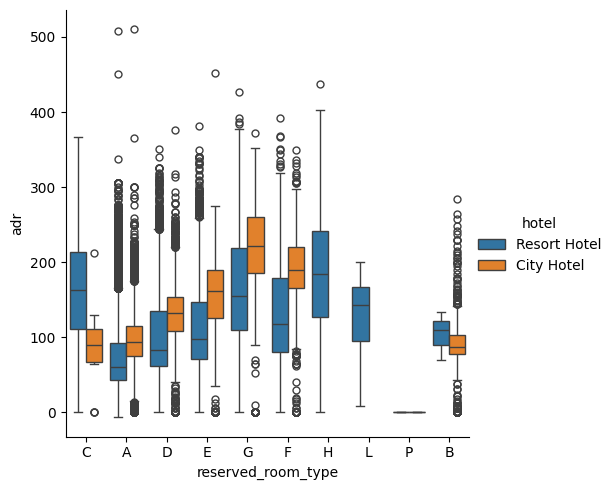

In [ ]:
sns.catplot(data=df,x="reserved_room_type",y="adr",kind="box" ,hue = 'hotel')

## How do different types of customers impact room pricing across hotels?
Tailor pricing strategies for each customer segment.
Offer targeted discounts to specific customer types to maximize revenue.
Understand which customer segments bring in higher profits.

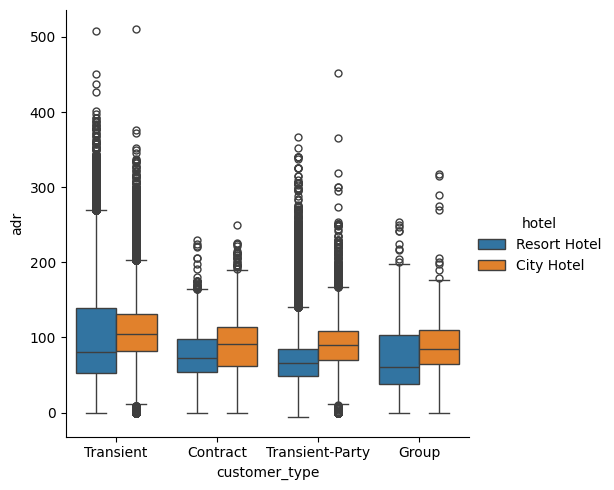

In [ ]:
# df[df['adr']>500]
sns.catplot(data=df,y="adr",x="customer_type",kind="box",hue="hotel")

## How far in advance do guests book rooms in different months, and does this vary by hotel type?
Plan marketing and promotions based on when guests book.
Allocate staff and resources earlier in high lead-time months.
Understand customer behavior to improve dynamic pricing models.

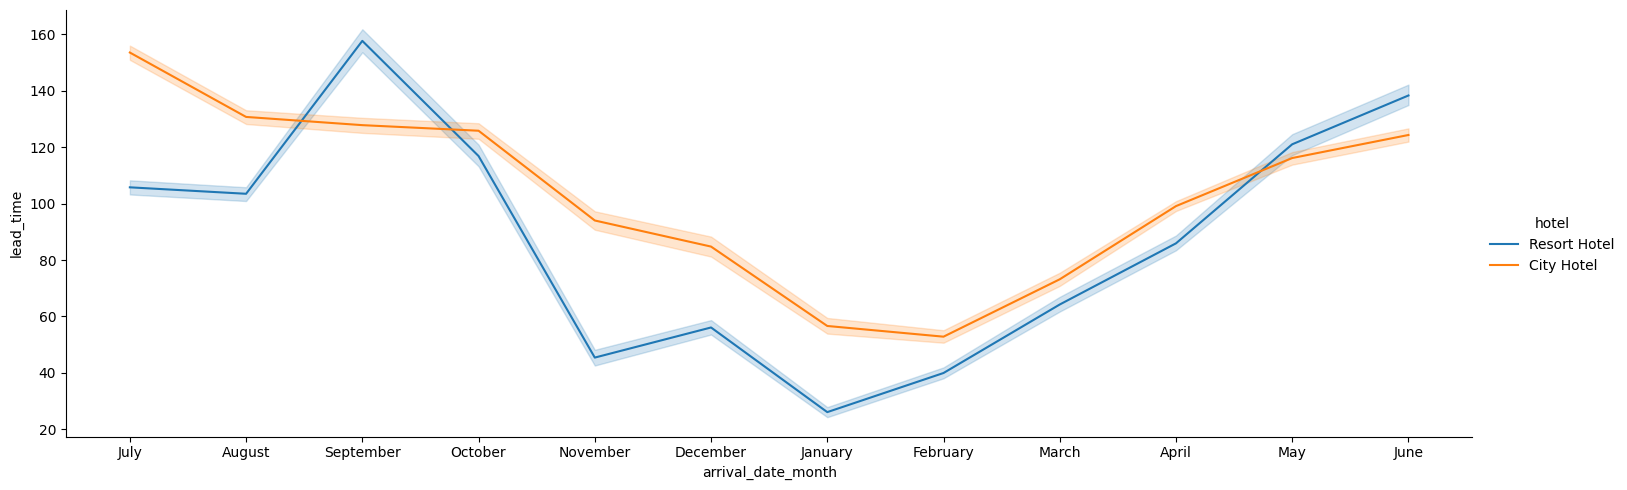

In [ ]:
sns.relplot(data=df,x="arrival_date_month",y="lead_time",kind="line",aspect=3,hue="hotel")

##Q. How do booking patterns, cancellations, and no-shows vary across different months?

August and July have peak bookings with high cancellations, demanding stricter policies, while February shows the most no-shows and winter months need targeted promotions.

<Axes: xlabel='reservation_status', ylabel='arrival_date_month'>

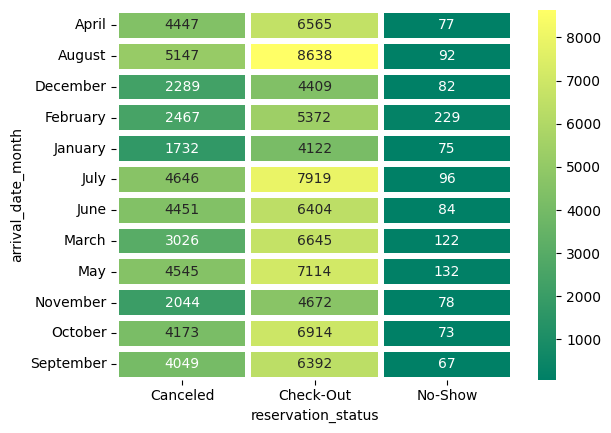

In [ ]:
heat_data = pd.crosstab(df["arrival_date_month"], df["reservation_status"])
sns.heatmap(heat_data,annot=False,fmt="d",cmap="summer",linewidths=3)

##How does booking density vary across years and months?

Booking density steadily increased year over year, with months like May, April, and March showing higher booking activity in 2017 compared to previous years, indicating growing demand during these months.

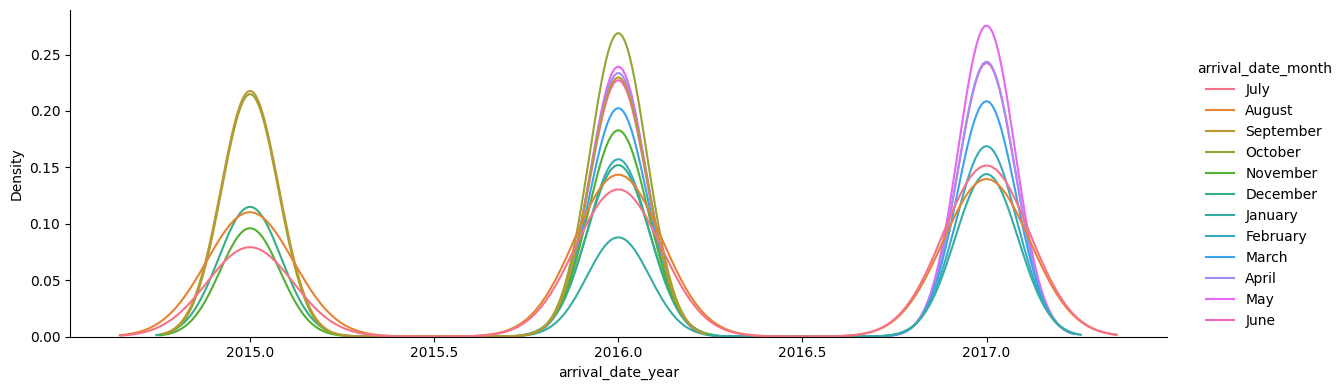

In [ ]:
sns.displot(data=df,x="arrival_date_year",kind="kde",hue="arrival_date_month",aspect=3,height=4)

##COUNTRY WITH MOST GUESTS

Most travelled country is PRT (Portugal) with following countries like GBR(United Kingdom ), FRA(France) , ESP(Spain) , DEU(Germany)

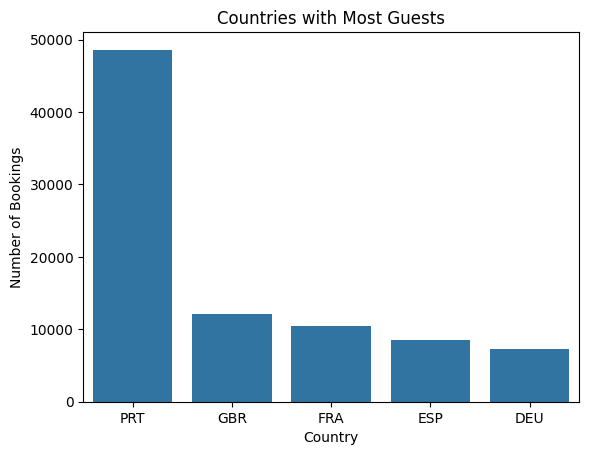

In [ ]:
top_countries = df["country"].value_counts().head(5)
sns.barplot(x=top_countries.index,y=top_countries,legend=False)
plt.title("Countries with Most Guests")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.show()

##BOOKING BY AGENT

By this we can clearly see that which agent helps the tourists .
This plot indicates which specific agents  are responsible for the largest number of bookings.


/tmp/ipython-input-26-2570115146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agent,x='agent',y='agent_booking',palette='magma')


<Axes: xlabel='agent', ylabel='agent_booking'>

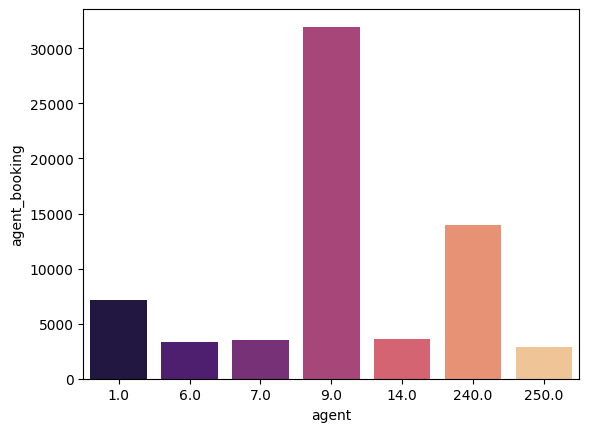

In [ ]:
agent=df["agent"].value_counts().head(7)
agent=agent.reset_index(name="agent_booking")
sns.barplot(data=agent,x='agent',y='agent_booking',palette='magma')